In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Below in our dataset, we have three features Ear Shape, Face Shape and Whiskers
## Our TargetClass is Cat, 0 -> not Cat , 1 -> Cat

In [5]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

### Plotting the entropy graph

In [21]:
probability_of_success = np.linspace(0, 1, 100)
probability_of_success = np.clip(probability_of_success, 1e-10, 1 - 1e-10)
entropy_values = [((-p * np.log2(p)) - ((1 - p) * np.log2(1 - p))) for p in probability_of_success]

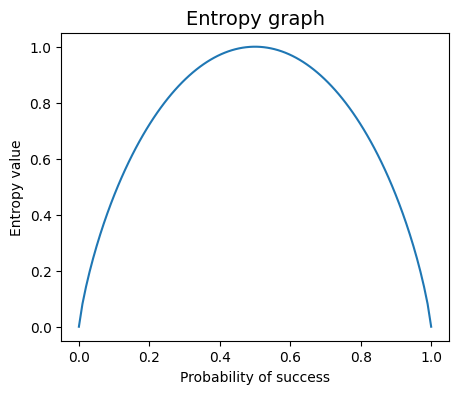

In [25]:
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('Entropy graph', fontsize = 14)
sns.lineplot(x = probability_of_success, y = entropy_values)
ax.set_xlabel('Probability of success')
ax.set_ylabel('Entropy value')
plt.show()

In [8]:
## Above is the entropy graph

In [9]:
def compute_entropy(p):
    if p == 0 or p == 1:
        return 0 ## Meaning its pure
    else:
        return -p * np.log2(p) - (1 - p) * (np.log2(1 - p))

In [10]:
compute_entropy(0.4)

np.float64(0.9709505944546686)

In [11]:
## From the entropy graph, we see that at p = 0.5, we have the highest impurity i.e; 1

In [26]:
## Below feature can be following :
## 0 -> Ear shape
## 1 -> Face shape
## 2 -> Whiskers

In [33]:
def split_data_based_on_feature(X_train, y_train, feature):
    left_indices = []
    right_indices = []
    ## Lets consider left_indices to hold where value of feature is 1
    for i in range(X_train.shape[0]):
        if X_train[i, feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices        

In [34]:
## Splitting the data by feature -> Ear shape lets say
split_data_based_on_feature(X_train, y_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [37]:
def compute_weighted_entropy(X_train, y_train, feature):

    left_indices, right_indices = split_data_based_on_feature(X_train, y_train, feature)
    
    prob_of_success_left_side = sum(y_train[left_indices]) / len(left_indices)
    prob_of_success_right_side = sum(y_train[right_indices]) / len(right_indices)

    entropy_left_side = compute_entropy(prob_of_success_left_side)
    entropy_right_side = compute_entropy(prob_of_success_right_side)
    weight_left_side = len(left_indices)/X_train.shape[0]
    weight_right_side = len(right_indices)/X_train.shape[0]

    return weight_left_side * entropy_left_side + weight_right_side * entropy_right_side

In [38]:
compute_weighted_entropy(X_train, y_train, 0)

np.float64(0.7219280948873623)

In [39]:
def information_gain(X_train, y_train, feature):
    p_node = sum(y_train)/len(y_train)
    h_node = compute_entropy(p_node)

    w_entropy = compute_weighted_entropy(X_train, y_train, feature)
    return h_node - w_entropy

In [41]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_data_based_on_feature(X_train,y_train, i)
    i_gain = information_gain(X_train, y_train, i)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


In [42]:
## So the best feature to split is the Ear feature, which has the highest information gain